In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.gridspec import GridSpec

## [Problem 14-1]

### 1-1 Import Data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

data.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

             BOVESPA        EU        EM  
date                                      
2009-01-05  0.031190  0.012698  0.028524  
2009-01-06  0.018920  0.011341  0.008773  
2009-01-07 -0.035899 -0.017073 -0.020015  
2009-01-08  0.028283 -0.005561 -0.019424  
2009-01-09 -0.009764 -0.010989 -0.007802

### 1-2 [그림 14-3] 재현
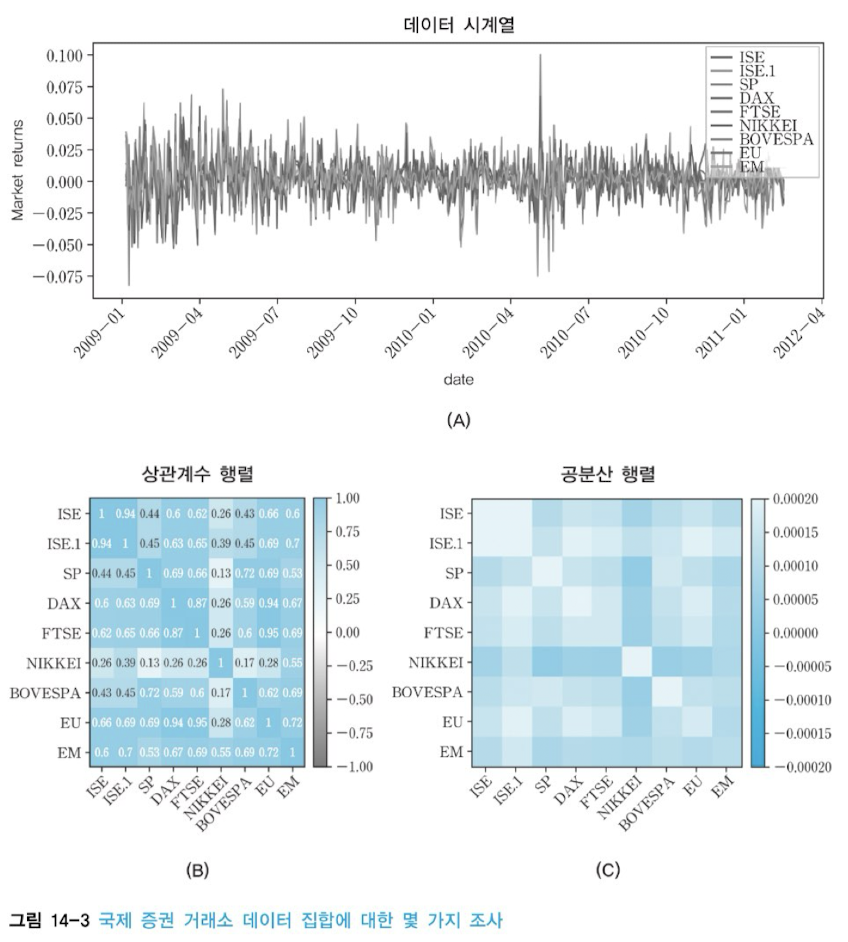

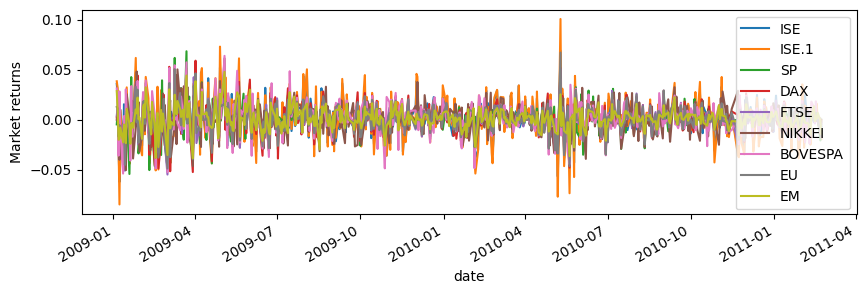

In [41]:
# 그림 (A): Time series plot
data.plot(figsize = (10,3),
          ylabel = 'Market returns')
plt.show()

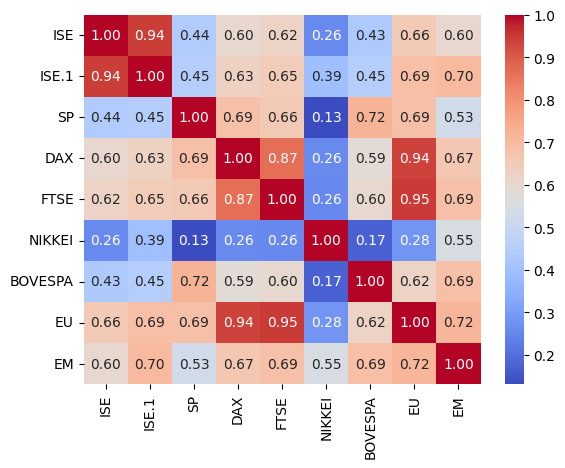

In [4]:
# 그림 (B): Correlation coefficient plot
corr_mat = data.corr()

sns.heatmap(corr_mat, cmap='coolwarm', annot=True, fmt=".2f") # corrcoef plot은 seaborn이 더 예쁘니까

plt.show()

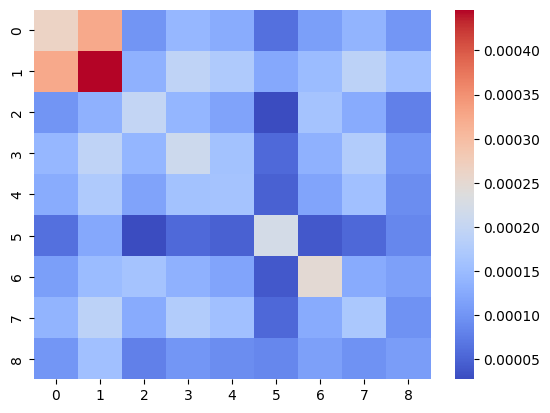

In [21]:
# 그림 (C): Covariance plot
col_mean = np.mean(data.values, axis=0, keepdims=True) # col means
data_centered = data.values - col_mean # mean-centered data

X_centered = data_centered

cov_mat = X_centered.T @ X_centered / (X_centered.shape[0] - 1)

sns.heatmap(cov_mat, cmap='coolwarm', annot=False)

plt.show()

### 1-3 PCA
**5단계에 걸친 PCA**
1. 데이터의 공분산 행렬 계산 (mean-centering하고!)
2. 공분산 행렬의 EVD
3. Eigenvalues를 내림차순 정렬 -> 그에 맞추어 Eigenvectors도 정렬
4. component score 계산
5. 고윳값을 분산 비율로 변환 (해석의 용이를 위해)

In [46]:
# 1. 데이터의 공분산 행렬 계산 (mean-centering하고!)
cov_mat # 구했지롱

# 2. 공분산 행렬의 EVD
evals, evecs = np.linalg.eig(cov_mat)

# 3. Eigenvalues를 내림차순 정렬 -> 그에 맞추어 Eigenvectors도 정렬
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:,idx]

# 4. component score 계산
components = data.values @ evecs[:, 0:2]

# 5. 고윳값을 분산 비율로 변환 (해석의 용이를 위해)
factorScores = 100*evals/np.sum(evals)

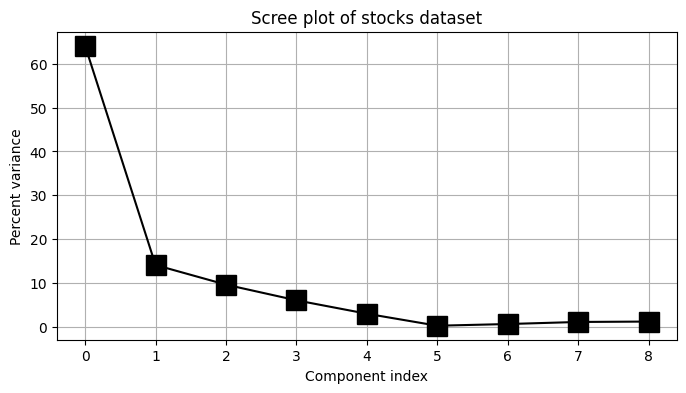

In [44]:
# show scree plot
plt.figure(figsize=(8,4))
plt.plot(factorScores,'ks-',markersize=15)
plt.xlabel('Component index')
plt.ylabel('Variance ratio')
plt.title('Scree plot')
plt.grid()
plt.show()

Variance of first two components:
[0.0013006  0.00028585]

First two eigenvalues:
[0.0013006  0.00028585]


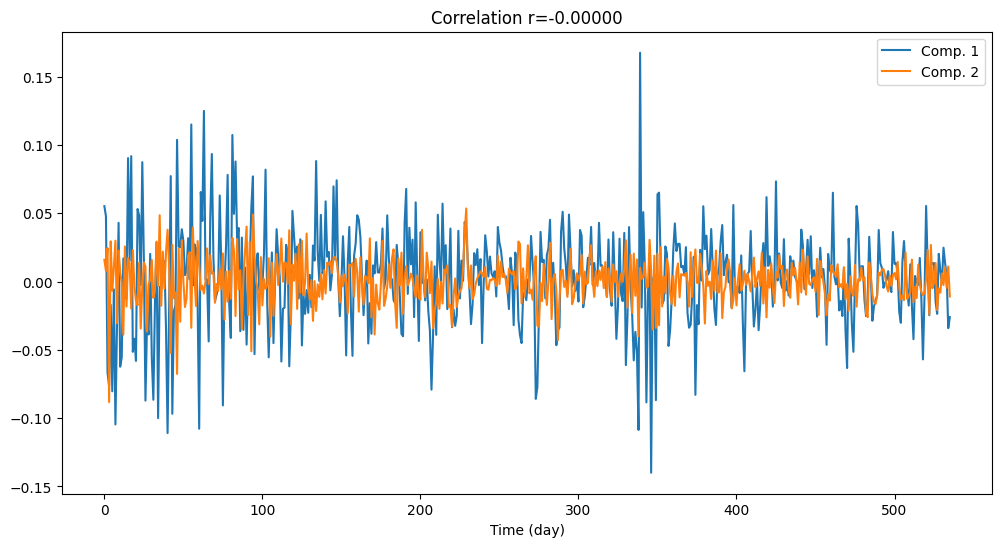

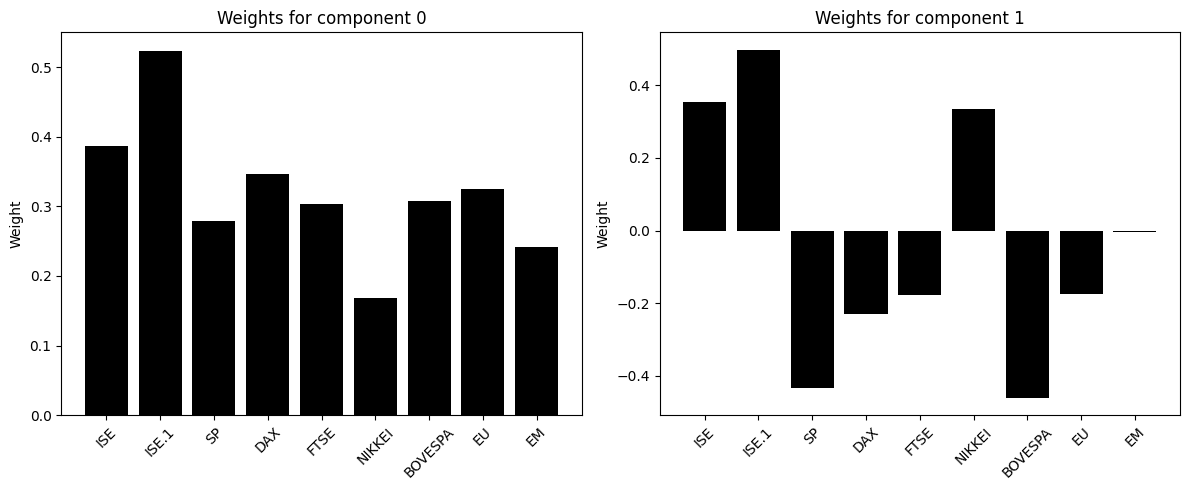

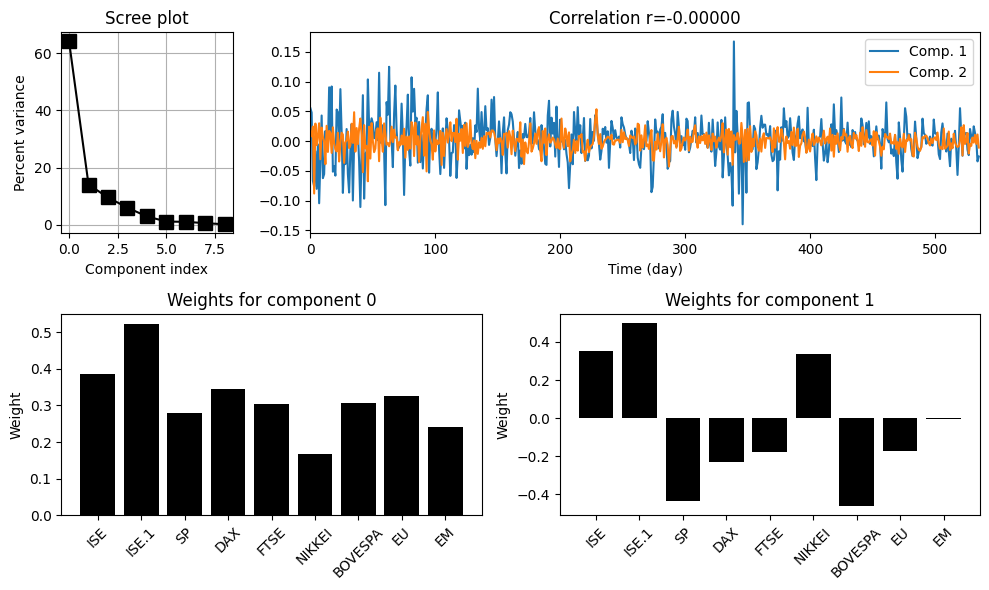

In [50]:
# 자 일단 천천히 이해해보자
# Show that variance of the components equals the eigenvalue
print('Variance of first two components:')
print(np.var(components,axis=0,ddof=1)) # note the ddof=1! The default produces the biased variance.

print(f'\nFirst two eigenvalues:')
print(evals[:2])


# correlate first two components

plt.figure(figsize=(12,6))
plt.plot(components)
plt.xlabel('Time (day)')
plt.legend(['Comp. 1','Comp. 2'])
plt.title(f'Correlation r={np.corrcoef(components.T)[0,1]:.5f}')
plt.show()


_,axs = plt.subplots(1,2,figsize=(12,5))

for i in range(2):
  axs[i].bar(range(data.values.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(data.values.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('Weight')
  axs[i].set_title(f'Weights for component {i}')

plt.tight_layout()
plt.show()


# Now all in one figure

fig = plt.figure(figsize=(10,6))
gs = GridSpec(2,4,figure=fig)

# scree plot
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(factorScores,'ks-',markersize=10)
ax1.set_xlabel('Component index')
ax1.set_ylabel('Percent variance')
ax1.set_title('Scree plot')
ax1.grid()


# component time series
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(components)
ax2.set_xlabel('Time (day)')
ax2.set_xlim([0,components.shape[0]])
ax2.legend(['Comp. 1','Comp. 2'])
ax2.set_title(f'Correlation r={np.corrcoef(components.T)[0,1]:.5f}')


# bar plots of component loadings
axs = fig.add_subplot(gs[1,:2]), fig.add_subplot(gs[1,2:])
for i in range(2):
  axs[i].bar(range(data.values.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(data.values.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('Weight')
  axs[i].set_title(f'Weights for component {i}')


plt.tight_layout()
plt.show()

---

## [Problem 14-2]
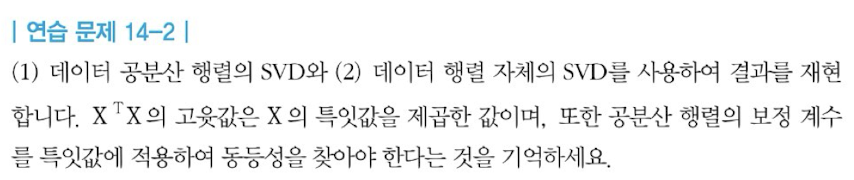

In [60]:
# (1) covmat의 SVD
U,s,Vt = np.linalg.svd(cov_mat)

# Eigen values VS Singular values
print(f'Eigenvalues: \n{evals[:4]}')

print(f'Singular values: \n{s[:4]}')


# Eigen vectors VS Singular vectors
print(f'\nEigenvector: \n{evecs[:,0]}')

print(f'Singular vector: \n{U[:,0]}')

Eigenvalues: 
[0.0013006  0.00028585 0.00019503 0.00012253]
Singular values: 
[0.0013006  0.00028585 0.00019503 0.00012253]

Eigenvector: 
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]
Singular vector: 
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


- cov_mat은 대칭행렬이니까 !

In [62]:
# (2) X 자체의 SVD
# X'X의 Eval = (X의 Svals)^2

X = data.values

U,s,Vt = np.linalg.svd(X)

# eigen/singular values
print('X\'X의 Eigenvalues:')
print(evals[:4])

print(f'X의 Singular values:')
print(s[:4]**2/(X.shape[0]-1))


# eigen/singular vectors
print('\nX\'X의 Eigenvector:')
print(evecs[:,0])

print('X의 Right singular vector:')
print(Vt[0,:])

X'X의 Eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]
X의 Singular values:
[0.00130815 0.00028601 0.0001951  0.00012286]

X'X의 Eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]
X의 Right singular vector:
[-0.38781869 -0.5243021  -0.27825972 -0.34562324 -0.30245905 -0.16748105
 -0.30756988 -0.32446329 -0.2416879 ]


## [Problem 14-3]
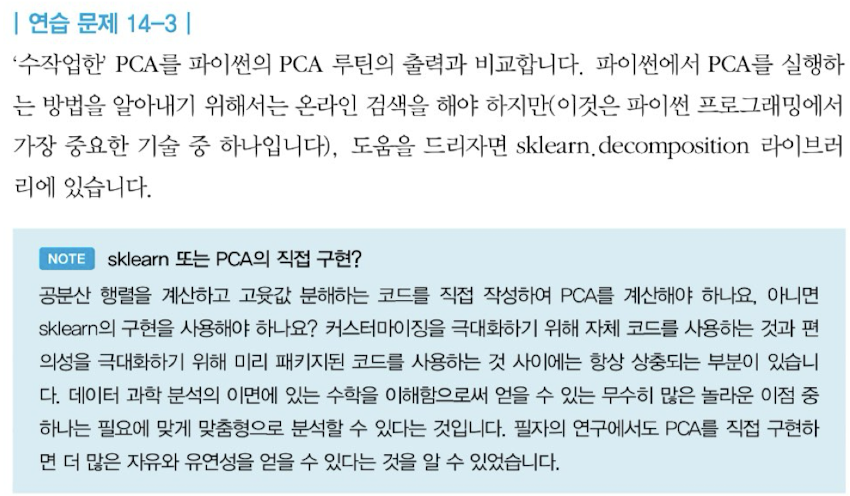

In [63]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA()
X_pca = pca.fit_transform(X)

array([[ 0.0524148 ,  0.01548812, -0.00918583, ...,  0.00464866,
         0.0068441 ,  0.00699368],
       [ 0.04506811,  0.00748826, -0.00706312, ..., -0.00435705,
        -0.00193903, -0.00047338],
       [-0.06959746,  0.02407384,  0.02129056, ..., -0.00121518,
        -0.00796255,  0.0054828 ],
       ...,
       [ 0.00145891, -0.0050516 ,  0.00352487, ...,  0.0034939 ,
         0.00305212,  0.00023184],
       [-0.0368831 ,  0.01059206,  0.00700615, ...,  0.00307766,
         0.00020588, -0.00020787],
       [-0.02880234, -0.01134873, -0.01374974, ..., -0.00322506,
         0.0019753 , -0.00170042]])

In [68]:
print(f'Eigenvalues: \n{evals[:4]}')
print()
print(f'Explained variance: \n{pca.explained_variance_[:4]}')

Eigenvalues: 
[0.0013006  0.00028585 0.00019503 0.00012253]

Explained variance: 
[0.0013006  0.00028585 0.00019503 0.00012253]


In [69]:
print(f'Eigenvectors: \n{evecs[:4]}')
print()
print(f'Component vectors: \n{pca.components_[:4]}')

Eigenvectors: 
[[ 0.3864847   0.35298874  0.33940396 -0.14970844  0.06821543  0.13073363
   0.39457344 -0.63777909 -0.06500667]
 [ 0.52390953  0.49823792  0.21717495 -0.1566995   0.05389104 -0.06031592
  -0.26007767  0.56962473  0.08308489]
 [ 0.27860507 -0.43379401 -0.0068195  -0.14904863  0.81380161 -0.14714464
  -0.14950072 -0.07426774 -0.0122151 ]
 [ 0.34621538 -0.23047826 -0.00229672  0.47869022 -0.05324106  0.69157562
  -0.14933137 -0.0189335   0.30674956]]

Component vectors: 
[[ 0.3864847   0.52390953  0.27860507  0.34621538  0.30322542  0.16781756
   0.30741897  0.32544121  0.24111348]
 [ 0.35298874  0.49823792 -0.43379401 -0.23047826 -0.17721358  0.33454308
  -0.46063876 -0.17416684 -0.00381729]
 [-0.33940396 -0.21717495  0.0068195   0.00229672 -0.01055111  0.87202354
   0.13349569 -0.00184435  0.24336666]
 [ 0.14970844  0.1566995   0.14904863 -0.47869022 -0.37160553 -0.03928985
   0.63828975 -0.37424992  0.1206717 ]]


## [Problem 14-4]
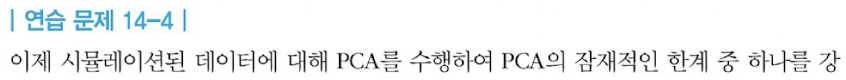
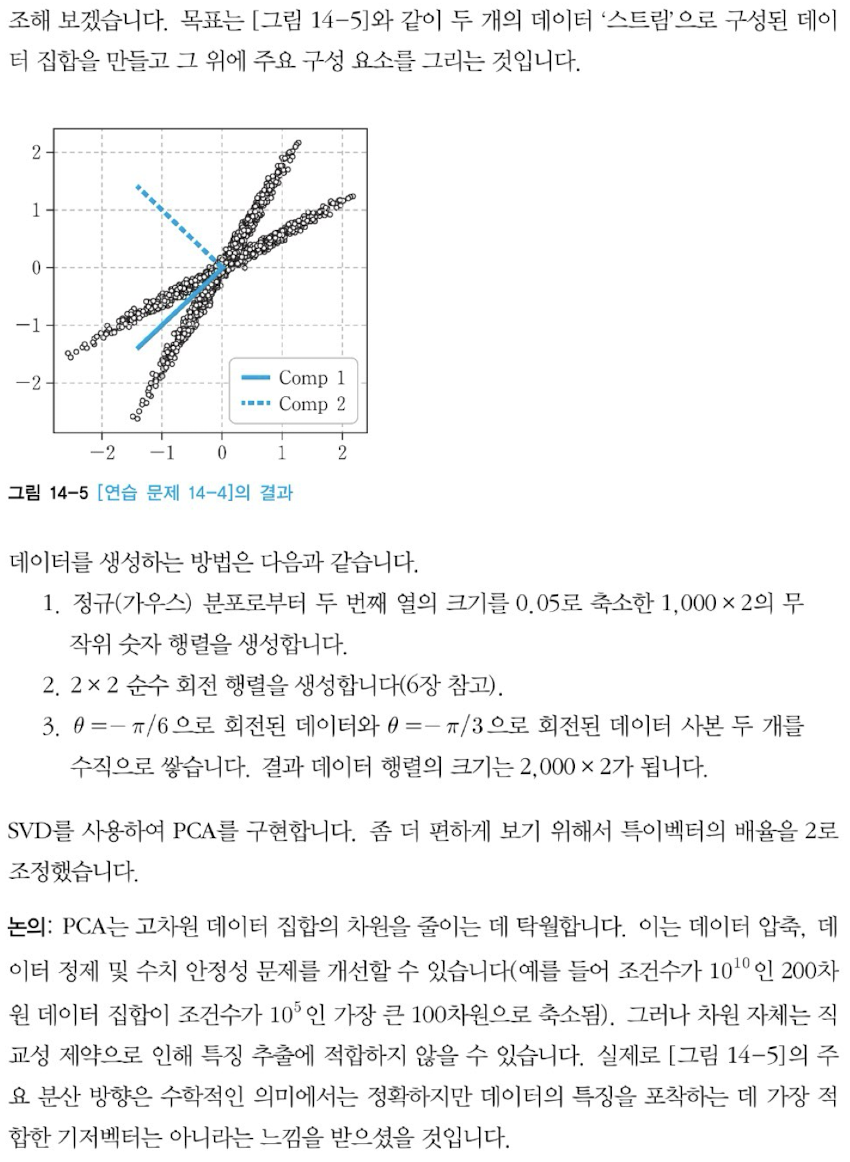

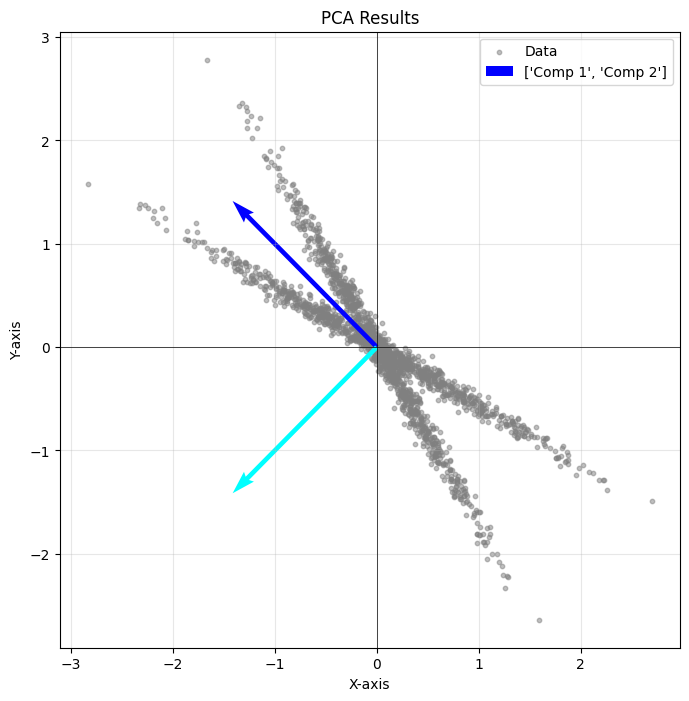

In [70]:
np.random.seed(42)
n_samples = 1000
std_dev = 0.05

# 1. Normal data
data1 = np.random.randn(n_samples, 2)
data1[:, 1] *= std_dev  # 두 번째 열 축소

# 2. 2x2 rotation matrix 생성
theta1 = -np.pi / 6
theta2 = -np.pi / 3
rotation_matrix1 = np.array([[np.cos(theta1), -np.sin(theta1)],
                             [np.sin(theta1), np.cos(theta1)]])
rotation_matrix2 = np.array([[np.cos(theta2), -np.sin(theta2)],
                             [np.sin(theta2), np.cos(theta2)]])

# rotate
rotated_data1 = data1 @ rotation_matrix1.T
rotated_data2 = data1 @ rotation_matrix2.T

# 3. vstack
data = np.vstack([rotated_data1, rotated_data2])

# PCA 실행 (SVD 활용)
mean = np.mean(data, axis=0)
centered_data = data - mean
U, S, Vt = np.linalg.svd(centered_data)
principal_components = Vt[:2]  # 첫 두 개 주성분

# 주성분 벡터 스케일 조정
scaling_factor = 2
pc_vectors = principal_components * scaling_factor

# 결과 시각화
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label="Data", color="gray", s=10)

# 주성분 벡터 시각화
origin = np.array([[0, 0], [0, 0]])  # 시작점
plt.quiver(*origin, pc_vectors[:, 0], pc_vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=['blue', 'cyan'], label=["Comp 1", "Comp 2"])

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend()
plt.title("PCA Results")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


## [Problem 14-10 ~ 14-12]: Shared Problem 1

## [Problem 14-13 ~ 14-14]: Shared Problem 2

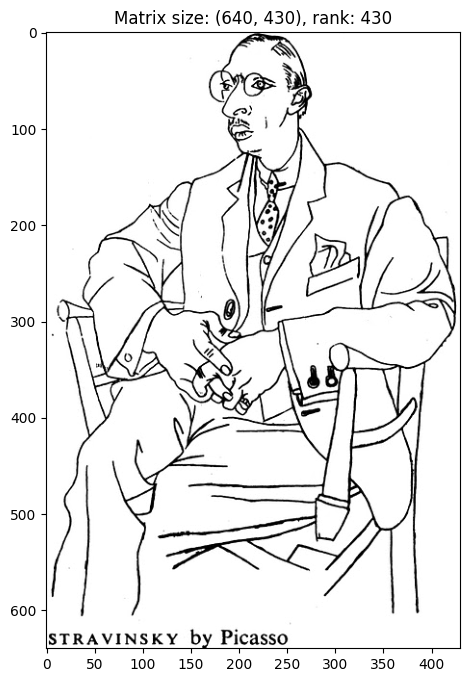

In [71]:
# 원본 그림
from skimage import io,color
url = 'https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png'

# import picture and downsample to 2D
strav = io.imread(url) / 255
#strav = color.rgb2gray(strav)

plt.figure(figsize=(8,8))
plt.imshow(strav,cmap='gray')
plt.title(f'Matrix size: {strav.shape}, rank: {np.linalg.matrix_rank(strav)}')
plt.show()

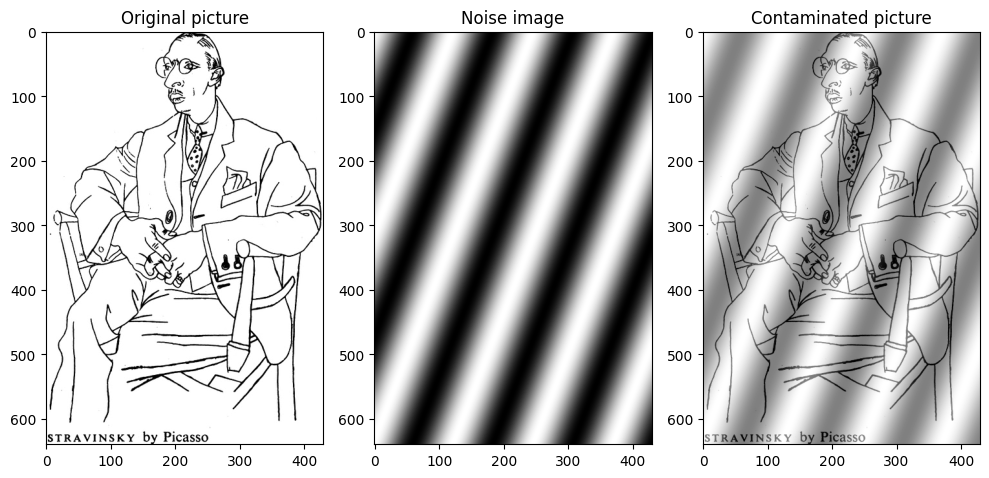

In [72]:
# create a spatial sine wave

# sine phases
sinefreq = .02   # arbitrary units
sinephas = np.pi/6 # rotate

# sine wave initializations
[x,y] = np.meshgrid(np.linspace(-100,100,strav.shape[1]),
                    np.linspace(-100,100,strav.shape[0]))
xp    = x*np.cos(sinephas) + y*np.sin(sinephas)


# Z
sinimg = np.sin(2*np.pi*sinefreq*xp)

# 0에서 1사이로 조정 Scaling
sinimg = (sinimg-np.min(sinimg)) / (np.max(sinimg)-np.min(sinimg))


# add to stravinsky picture and re-scale (using two lines)
stravNoise = strav + sinimg
stravNoise = stravNoise-np.min(stravNoise)
stravNoise = stravNoise/np.max(stravNoise)

# let's see it!
_,axs = plt.subplots(1,3,figsize=(10,7))
# 원본 사진
axs[0].imshow(strav,cmap='gray')
axs[0].set_title('Original picture')

# 노이즈
axs[1].imshow(sinimg,cmap='gray')
axs[1].set_title('Noise image')

# 원본 + 노이즈
axs[2].imshow(stravNoise,cmap='gray')
axs[2].set_title('Contaminated picture')

plt.tight_layout()
plt.show()

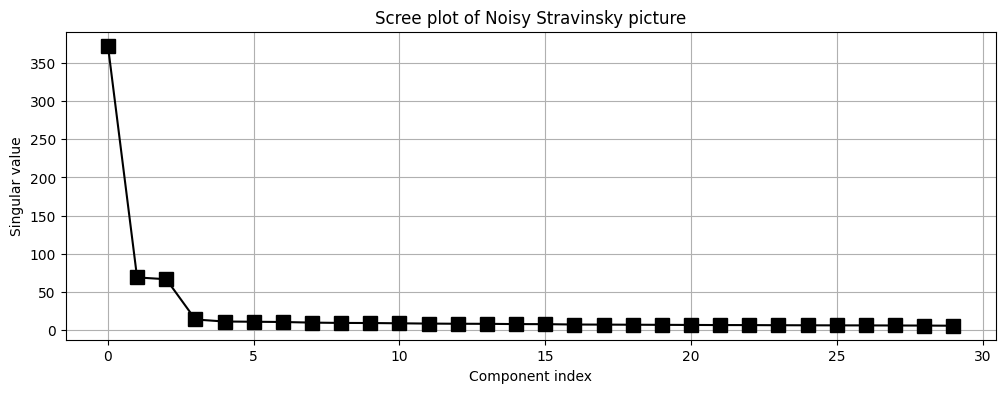

In [73]:
# SVD
Un,sn,Vtn = np.linalg.svd(stravNoise)
Sn = np.zeros_like(stravNoise)
np.fill_diagonal(Sn,sn)

# Scree plot
plt.figure(figsize=(12,4))
plt.plot(sn[:30],'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Singular value')
plt.title('Scree plot of Noisy Stravinsky picture')
plt.grid()
plt.show() # 대강 2,3개의 Layer만으로도 꽤괜이라고 판단 (이 책에서 4개의 layers 활용)

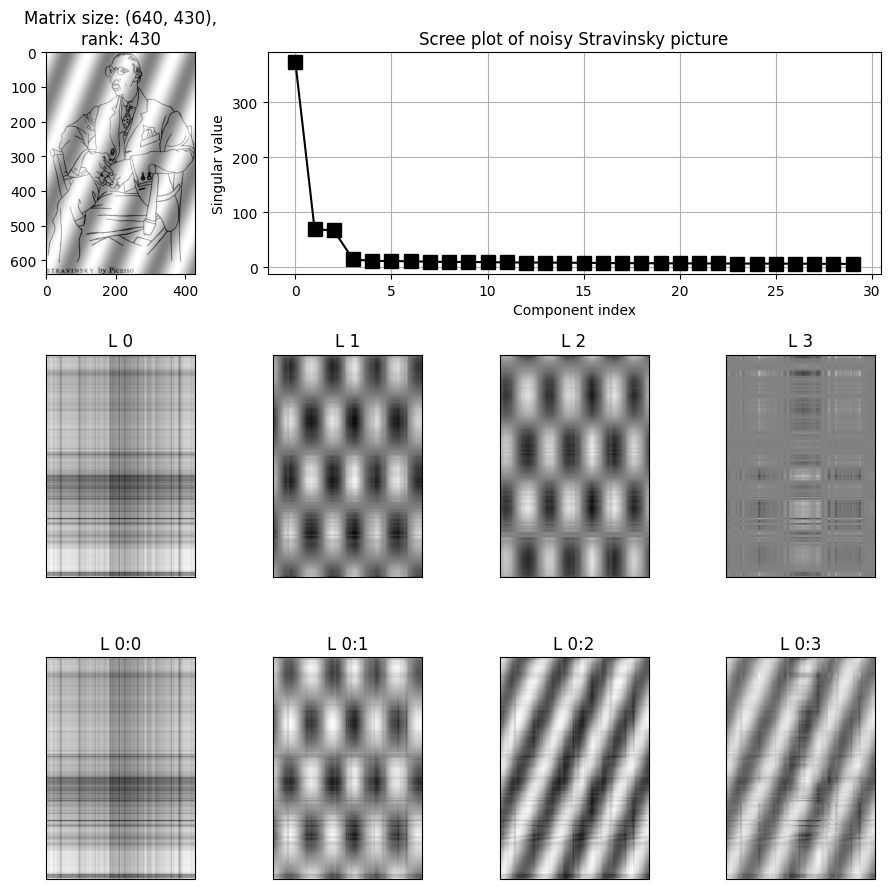

In [74]:
fig = plt.figure(figsize=(9,9))
gs = GridSpec(3,4,figure=fig)

# the image
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(stravNoise,cmap='gray')
ax1.set_title(f'Matrix size: {strav.shape},\nrank: {np.linalg.matrix_rank(stravNoise)}')

# scree plot
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(sn[:30],'ks-',markersize=10)
ax2.set_xlabel('Component index')
ax2.set_ylabel('Singular value')
ax2.set_title('Scree plot of noisy Stravinsky picture')
ax2.grid()


## now show the first N "layers" separately
numLayers = 4
rank1mats = np.zeros((numLayers,strav.shape[0],strav.shape[1]))


# the loop
for i in range(numLayers):

    # create this layer
    rank1mats[i,:,:] = np.outer(Un[:,i],Vtn[i,:])*sn[i]

    # show this layer (단일 레이어만 show)
    ax = fig.add_subplot(gs[1,i])
    ax.imshow(rank1mats[i,:,:],cmap='gray')
    ax.set_title(f'L {i}')
    ax.set_xticks([]), ax.set_yticks([])

    # show the cumulative sum of layers (Layers 누적합을 Show)
    ax = fig.add_subplot(gs[2,i])
    ax.imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray')
    ax.set_title(f'L 0:{i}')
    ax.set_xticks([]), ax.set_yticks([])


plt.tight_layout()
plt.show() # 3개면 꽤괜일 줄 알았는데 식별이 불가능하네

---
**잡음 제거**

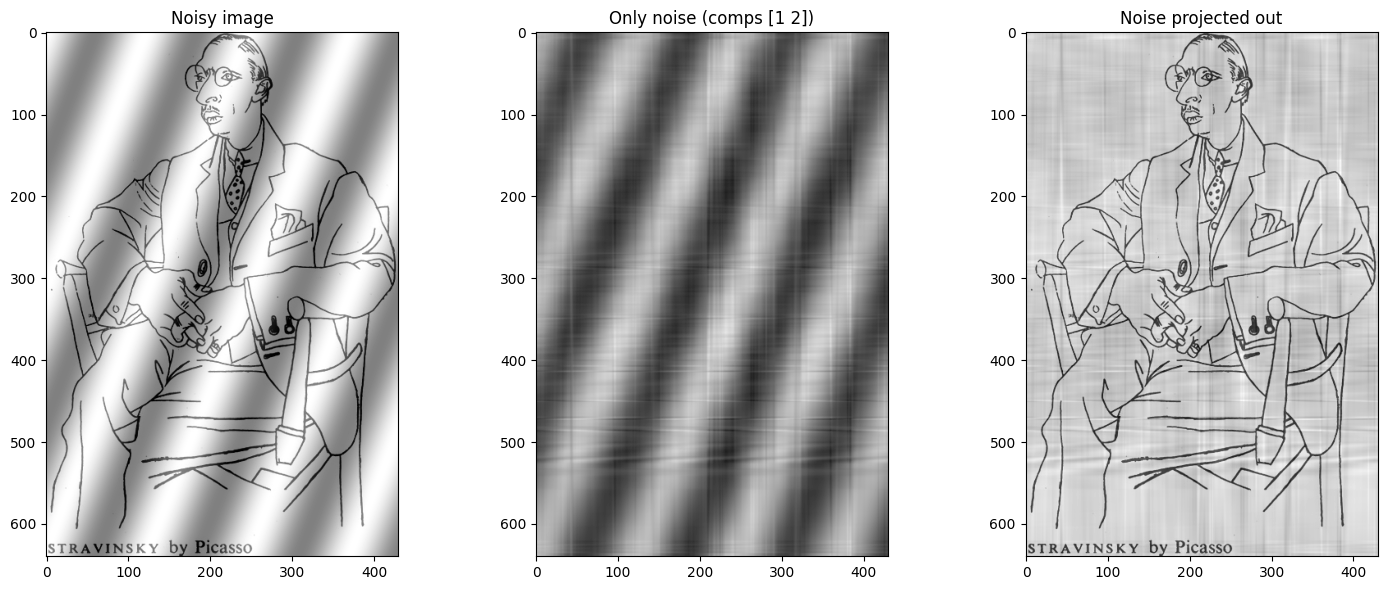

In [75]:
# Reconstruct without specified layers

# noise components
noiseComps = np.array([1,2]) # 노이즈를 모를 땐 어떻게 노이즈를 제거하지

# reconstruction of the noise
stravRecNoise = Un[:,noiseComps] @ Sn[noiseComps,:][:,noiseComps] @ Vtn[noiseComps,:]


# reconstruction of the image with noise projected out
noNoiseCompsU = np.full(Un.shape[0],True)
noNoiseCompsU[noiseComps] = False

noNoiseCompsV = np.full(Vtn.shape[0],True)
noNoiseCompsV[noiseComps] = False

# here's the image without the noise components
stravRecNoNoise = Un[:,noNoiseCompsU] @ Sn[noNoiseCompsU,:][:,noNoiseCompsV] @ Vtn[noNoiseCompsV,:]


# show the original, reconstructed, and error
_,axs = plt.subplots(1,3,figsize=(15,6))

# 원본
axs[0].imshow(stravNoise,cmap='gray')
axs[0].set_title('Noisy image')

# 노이즈 Only
axs[1].imshow(stravRecNoise,cmap='gray',vmin=-.5,vmax=.5)
axs[1].set_title(f'Only noise (comps {noiseComps})')

# 노이즈 제거
axs[2].imshow(stravRecNoNoise,cmap='gray',vmin=.1,vmax=.9)
axs[2].set_title('Noise projected out')

plt.tight_layout()
plt.show()

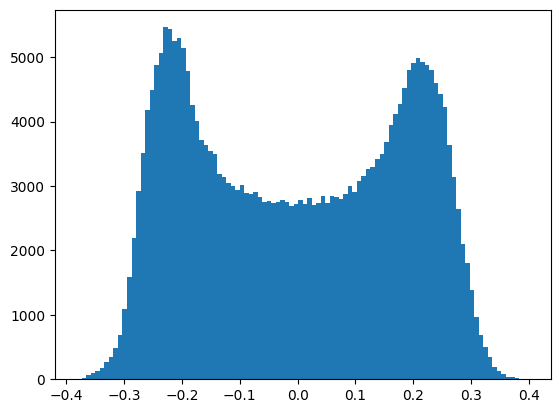

In [76]:
# histogram of noise reconstruction
plt.hist(stravRecNoise.flatten(),100);

잡음 제거 그림의 퀄리티는 꽤 괜찮아 보이지만, 불완전
- 이유 1: 노이즈가 2차원에 완전히 포함되지 않았기 떄문이다
- 이유 2: 노이즈 프로젝션은 음숫값 (But, 사인 격자에는 음숫값이 없음에도 0 주변에 분포)